In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

In [3]:
from sklearn.cluster import MeanShift

In [4]:
df = pd.read_csv('checkins.dat', sep='|', low_memory=False, skiprows=[1], skipinitialspace=True)
df.head()

,id,user_id,venue_id,latitude,longitude,created_at
0,984301,2041916.0,5222.0,NaN,NaN,2012-04-21 17:39:01
1,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
2,984315,1764391.0,5222.0,NaN,NaN,2012-04-21 17:37:18
3,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
4,984249,2146840.0,5222.0,NaN,NaN,2012-04-21 17:42:58


In [5]:
df = df.dropna()

In [6]:
df.shape

(396634, 6)

In [7]:
df = df[: 100000]
df.shape

(100000, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1 to 233798
Data columns (total 6 columns):
id                  100000 non-null object
user_id             100000 non-null float64
venue_id            100000 non-null float64
latitude            100000 non-null float64
longitude           100000 non-null float64
created_at          100000 non-null object
dtypes: float64(4), object(2)
memory usage: 5.3+ MB


In [9]:
cols = ['latitude      ', 'longitude     ']
df_cor = df[cols]

In [10]:
ms = MeanShift(bandwidth=0.1, n_jobs=-1)

In [13]:
%%time
ms.fit(df_cor)

CPU times: user 36.1 s, sys: 6.55 s, total: 42.6 s
Wall time: 11min 17s


MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=-1, seeds=None)

In [14]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [15]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print(f'number of estimated clusters: {n_clusters_}')

number of estimated clusters: 3231


In [19]:
d = {}
for label in labels:
    if label not in d.keys():
        d[label] = 1
    else:
        d[label] += 1

count = 0
for key in d.keys():
    if d[key] > 15:
        count += 1
count

592

In [20]:
clusters_select = np.ndarray(shape=(count,2))
clusters_select

array([[ 6.90221743e-310,  6.90221743e-310],
       [ 5.27974675e-316,  5.27974675e-316],
       [ 4.94065646e-324,  5.27976810e-316],
       ...,
       [-4.48771565e+119, -3.51784307e-008],
       [ 2.25601905e+234,  3.37119549e-198],
       [-1.00998775e-169, -9.79596035e+057]])

In [26]:
i = 0
j = 0
while i < len(cluster_centers):
    if d[i] > 15:
        clusters_select[j] = cluster_centers[i]
        j += 1
    i += 1

len(clusters_select)

592

In [27]:
clusters_select[0]

array([ 40.7177164 , -73.99183542])

In [21]:
offices = np.ndarray(shape=(6,2))
offices[0] = np.array([33.751277, -118.188740])
offices[1] = np.array([25.867736, -80.324116])
offices[2] = np.array([51.503016, -0.075479])
offices[3] = np.array([52.378894, 4.885084])
offices[4] = np.array([39.366487, 117.036146])
offices[5] = np.array([-33.868457, 151.205134])

In [23]:
def distance(point1, point2):
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5

In [28]:
distance(offices[0], clusters_select[123])

20.892897123756782

In [29]:
answer_index = 0
min_dist = 0
i = 0
while i < len(clusters_select):
    distances = [distance(xx, clusters_select[i]) for xx in offices]
    if min_dist == 0:
        min_dist = min(distances)
        answer_index = i
    else:
        if min_dist > min(distances):
            min_dist = min(distances)
            answer_index = i
    i += 1

answer_index

417

In [30]:
min_dist

0.007834758163107856

In [31]:
clusters_select[answer_index]

array([-33.86063043, 151.20477593])

In [32]:
def write_answer(center):
    with open("answer.txt", "w") as f:
        f.write(str(center[0]) + ' ' + str(center[1]))

In [33]:
write_answer(clusters_select[answer_index])

In [17]:
from itertools import cycle

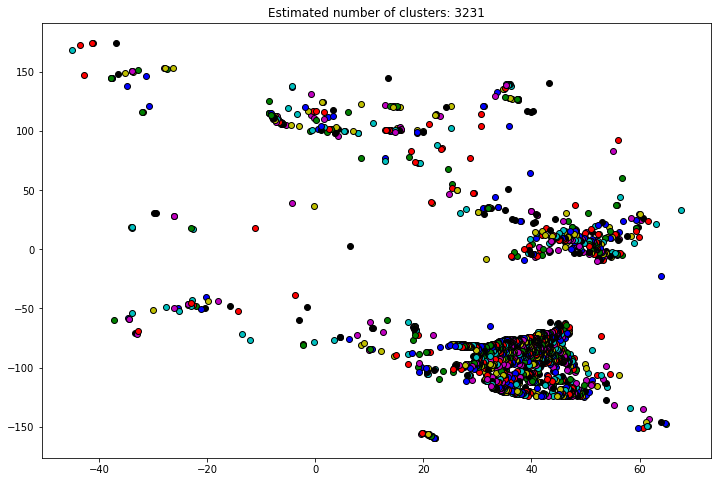

In [18]:
plt.figure(figsize=(12, 8))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
#     plt.plot(df_cor[my_members, 0], df_cor[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)
plt.title(f'Estimated number of clusters: {n_clusters_}')
plt.show();